In [1]:
import matplotlib.pyplot as plt
import gzip
from numpy import *
from numpy.linalg import *
from matplotlib import rcParams
from sklearn import linear_model
import scipy
import random
from scipy import io
import os


In [2]:
%matplotlib inline  

In [3]:
year = linspace(1845, 1903, 30)
year = year - 1845
hare = array([20, 20, 52, 83, 64, 68, 83, 12, 36, 150, 110, 60, 7, 10, 70, 100, 92, 70, 10, 11, 137, 137, 18, 22, 52, 83, 18, 10, 9, 65])
lynx = array([32, 50, 12, 10, 13, 36, 15, 12, 6, 6, 65, 70, 40, 9, 20, 34, 45, 40, 15, 15, 60, 80, 26, 18, 37, 50, 35, 12, 12, 25])
delta_t = year[1] - year[0]

In [4]:
print(year)

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50. 52. 54. 56. 58.]


Text(0.5, 1.0, 'Hare vs Lynx populations of our given data set')

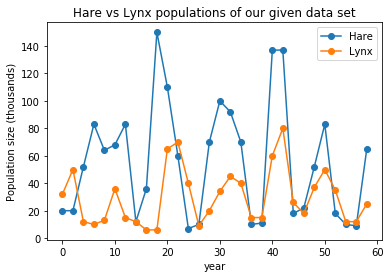

In [5]:
plt.plot(year, hare, '-o', label = "Hare")
plt.plot(year, lynx, '-o', label = "Lynx")
plt.xlabel("year")
plt.ylabel("Population size (thousands)")
plt.legend()
plt.title("Hare vs Lynx populations of our given data set")

58.0


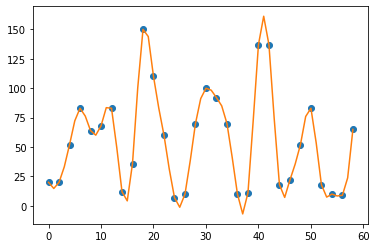

In [411]:
hare2 = scipy.interpolate.CubicSpline(year, hare)
plt.plot(year, hare, 'o')
print(year[-1])
year_double = range(int(year[-1])+1)
plt.plot(year_double, hare2(year_double))

In [6]:
def DMD(X,Xprime,r): #Copied from notes
    U,Sigma,VT = svd(X,full_matrices=0) # Step 1
    Ur = U[:,:r]
    Sigmar = diag(Sigma[:r])
    VTr = VT[:r,:]
    Atilde = solve(Sigmar.T,(Ur.T @ Xprime @ VTr.T).T).T # Step 2
    Lambda, W = eig(Atilde) # Step 3
    Lambda = diag(Lambda)
    
    Phi = Xprime @ solve(Sigmar.T,VTr).T @ W # Step 4
    alpha1 = Sigmar @ VTr[:,0]
    b = solve(W @ Lambda,alpha1)
    return Phi, Lambda, b

In [7]:
X = array([hare, lynx])
print(X[:,1:-1])

[[ 20  52  83  64  68  83  12  36 150 110  60   7  10  70 100  92  70  10
   11 137 137  18  22  52  83  18  10   9]
 [ 50  12  10  13  36  15  12   6   6  65  70  40   9  20  34  45  40  15
   15  60  80  26  18  37  50  35  12  12]]


In [8]:
Phi, Lambda, b = DMD(X[:, :-2],X[:, 1:-1],2)

In [9]:
X.shape

(2, 30)

In [10]:
print(Phi)
print(Lambda)
print(b)

[[-0.56137232  0.10139232]
 [-0.4299333   0.38293914]]
[[0.70709372 0.        ]
 [0.         0.39613481]]
[-25.75703974  54.6462579 ]


In [11]:

t = 5
print(matmul(Phi, matmul(exp(Lambda * t), b)))

[502.98249378 498.2620393 ]


(50, 2)
[502.98249378 498.2620393 ]


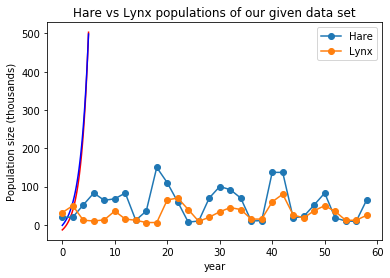

In [12]:
# x_sum = [0,0]
# Omega = np.array([[np.log(Lambda)[0,0] / delta_t, 0],[0, np.log(Lambda[0,0]) / delta_t]])
x = []
for t in linspace(0,5):
    x_t = matmul(Phi, matmul(exp(Lambda * t), b))#np.matmul(Phi, scipy.linalg.expm(Omega * t) * np.matrix.transpose(b))
    x.append(x_t)
x = array(x)
print(x.shape)
plt.plot(linspace(0,5), x[:,0], 'r')
plt.plot(linspace(0,5), x[:,1], 'b')
plt.plot(year, hare, '-o', label = "Hare")
plt.plot(year, lynx, '-o', label = "Lynx")
plt.xlabel("year")
plt.ylabel("Population size (thousands)")
plt.legend()
plt.title("Hare vs Lynx populations of our given data set")
    #     x_sum += x_t
print(x_t)
# print(X[:,-1])

In [13]:
Phi

array([[-0.56137232,  0.10139232],
       [-0.4299333 ,  0.38293914]])

## Time Delayed DMD

In [224]:
num = 20
H1=array([transpose(hare[0:num]),
          transpose(lynx[0:num]),
          transpose(hare[1:num+1]),
          transpose(lynx[1:num+1]),
          transpose(hare[2:num+2]),
          transpose(lynx[2:num+2]),
          transpose(hare[3:num+3]),
          transpose(lynx[3:num+3]),
          transpose(hare[4:num+4]),
          transpose(lynx[4:num+4]),
          transpose(hare[5:num+5]),
          transpose(lynx[5:num+5]),
          transpose(hare[6:num+6]),
          transpose(lynx[6:num+6]),
          transpose(hare[7:num+7]),
          transpose(lynx[7:num+7]),
          transpose(hare[8:num+8]),
          transpose(lynx[8:num+8]),
          transpose(hare[9:num+9]),
          transpose(lynx[9:num+9]),
          transpose(hare[10:num+10]),
          transpose(lynx[10:num+10])
         ])
print(H1.shape)

(22, 20)


(22, 20)
(20,)
(20, 20)


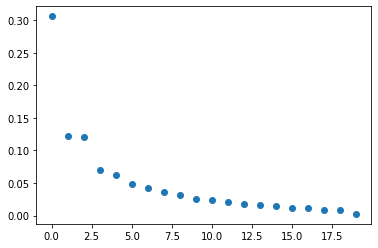

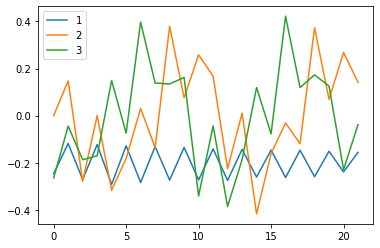

(20, 20)


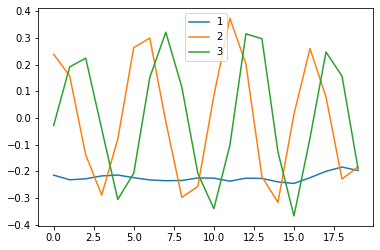

In [227]:
U,Sigma,VT = svd(H1,full_matrices=0) 
V = transpose(VT)
print(U.shape)
print(Sigma.shape)
print(V.shape)
# print(Sigma)
plt.plot(Sigma/ (sum(Sigma)), 'o')
plt.show()
plt.plot(U[:,0:3])
plt.legend(["1", "2", "3"])
plt.show()
print(V.shape)
plt.plot(V[:,0:3])
plt.legend(["1", "2", "3"])
plt.show()

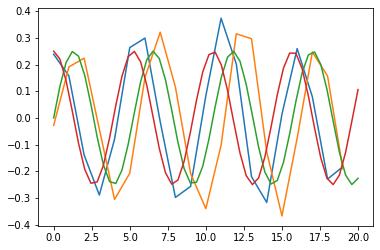

1.2566370614359172
5.711986642890532


In [245]:
plt.plot(V[:,1:3])
# plt.legend(["1", "2", "3"])
plt.plot(linspace(0,20), 0.25*sin(1.2*linspace(0,20)))
plt.plot(linspace(0,20), 0.25*cos(1.2*linspace(0,20)))
plt.show()
print(2*pi/5)
print(2*pi/1.1)

In [399]:
Phi, Lambda, b = DMD(H1[:, :-2],H1[:, 1:-1],2)

In [400]:
x = []
for t in linspace(0,5):
    x_t = matmul(Phi, matmul(exp(Lambda * t), b))#np.matmul(Phi, scipy.linalg.expm(Omega * t) * np.matrix.transpose(b))
    x.append(x_t)
x = array(x)
print(x)

[[-4.74241672e+01 -9.40107730e+00 -4.12790590e+01 ... -8.71742698e-01
  -2.75406212e+01 -1.10137742e+01]
 [-4.42204893e+01 -6.59897431e+00 -3.74533796e+01 ...  4.30106449e+00
  -2.36050159e+01 -7.46277990e+00]
 [-4.04425412e+01 -3.50103991e+00 -3.30407423e+01 ...  9.91390597e+00
  -1.91616404e+01 -3.54268140e+00]
 ...
 [ 6.68911824e+03  2.99027205e+03  6.61886514e+03 ...  4.05041530e+03
   5.47825990e+03  3.70921676e+03]
 [ 7.43931354e+03  3.31227134e+03  7.35478526e+03 ...  4.47313725e+03
   6.07985771e+03  4.10790016e+03]
 [ 8.27077661e+03  3.66855530e+03  8.17014096e+03 ...  4.94024302e+03
   6.74605410e+03  4.54899900e+03]]


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Hare vs Lynx populations of our given data set')

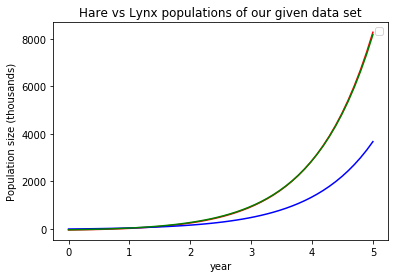

In [401]:
plt.plot(linspace(0,5), x[:,0], 'r')
plt.plot(linspace(0,5), x[:,1], 'b')
plt.plot(linspace(0,5), x[:,2], 'g')
# plt.plot(year, hare, '-o', label = "Hare")
# plt.plot(year, lynx, '-o', label = "Lynx")
plt.xlabel("year")
plt.ylabel("Population size (thousands)")
plt.legend()
plt.title("Hare vs Lynx populations of our given data set")

## Lotka-Volterra

In [150]:
x1 = hare[1:-14]
x2 = lynx[1:-14]
A = array([x1, x2, (x1*x2)]).transpose()
print(A.shape)
# print(A)

(15, 3)


2.0


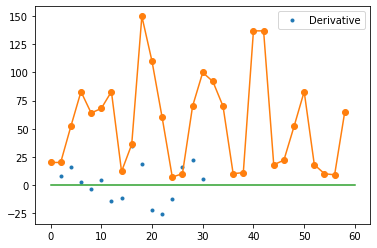

In [149]:
x1dot = zeros(len(hare)-15)
x2dot = zeros(len(lynx) -15 )
# n=length(t);
print(delta_t)
for j in range(1, len(hare)-14):
    x1dot[j-1]= (hare[j+1]-hare[j-1] )/(2*delta_t)
    x2dot[j-1]= (lynx[j+1]-lynx[j-1])/(2*delta_t)

    
# print(x1dot)
rhs = array([x1dot, x2dot]).transpose()
# print(b.shape)
plt.plot(year[1:-14], x1dot, '.', label = "Derivative")
plt.plot(year, hare, '-o')
plt.plot([0,60], [0,0])
plt.legend()

In [151]:
xi = linalg.lstsq(A,rhs)[0]
print(xi)
b = xi[0,0]
p = -xi[2,0]
r = xi[2, 1]
d = -xi[1,1]

[[ 0.18355783  0.03927866]
 [-0.03098559 -0.35075854]
 [-0.00569122  0.00449932]]


C:\Users\16kat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


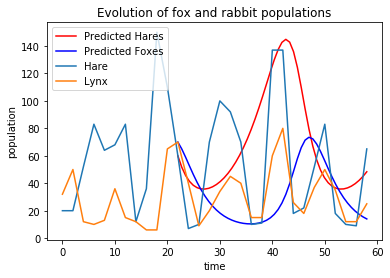

In [152]:
#!python

def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ (b-p*X[1])*X[0] ,
                  (r*X[0] - d)*X[1] ])    

# #!python
# X_f0 = array([ hare[0],  lynx[0]])
# X_f1 = array([hare[1], lynx[1]])
# all(dX_dt(X_f0) == zeros(2) ) and all(dX_dt(X_f1) == zeros(2)) # => True

# #!python
# def d2X_dt2(X, t=0):
#     """ Return the Jacobian matrix evaluated in X. """
#     return array([[b -p*X[1],   -p*X[0]     ],
#                   [r*X[1] ,   -d +r*X[0]] ])

# A_f0 = d2X_dt2(X_f0) 

# A_f1 = d2X_dt2(X_f1)                    # >>> array([[ 0.  , -2.  ],
#                                         #            [ 0.75,  0.  ]])
# # whose eigenvalues are +/- sqrt(c*a).j:
# lambda1, lambda2 = linalg.eigvals(A_f1) # >>> (1.22474j, -1.22474j)
# # They are imaginary numbers. The fox and rabbit populations are periodic as follows from further
# # analysis. Their period is given by:
# T_f1 = 2*pi/abs(lambda1)         

#!python
from scipy import integrate
step_n = 11
t = linspace(year[step_n], year[-1])              # time
X0 = array([hare[step_n], lynx[step_n]])                     # initials conditions: 10 rabbits and 5 foxes
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']  

#!python
rabbits, foxes = X.T
f1 = plt.figure()
plt.plot(t, rabbits, 'r-', label='Predicted Hares')
plt.plot(t, foxes  , 'b-', label='Predicted Foxes')
plt.plot(year, hare, label = "Hare")
plt.plot(year, lynx, label = "Lynx")
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')
f1.savefig('rabbits_and_foxes_1.png')

### Nonlinear dynamical fit with sparse regression

In [378]:
from_end = -10
x1 = hare[1:-1]
x2 = lynx[1:-1]
A_long = array([ones(x1.shape), x1, x2, (x1*x1), (x1*x2), (x2*x2), (x1**3), x1**2*x2, x1*x2**2, x2**3, \
          x1**4, x1**3*x2, x1**2*x2**2, x1*x2**3, x2**4, sin(x1), cos(x1), sin(x2), cos(x2), \
          sin(x1**2), cos(x1**2), sin(x1*x2), cos(x1*x2), sin(x2**2), cos(x2**2), \
          sin(2*x1), cos(2*x1), sin(2*x2), cos(2*x2), sin(1.1*x1), cos(1.1*x1), sin(1.1*x2), cos(1.1*x2)]).transpose()
A = A_long[0:from_end+1,:]
# print(A)
print(A_long.shape)
print(A.shape)
# print(A)
x1dot = zeros(len(hare)+from_end-1)
x2dot = zeros(len(lynx)+ from_end-1)
# n=length(t);
print(delta_t)
for j in range(1, len(hare)+from_end):
    x1dot[j-1]= (hare[j+1]-hare[j-1] )/(2*delta_t)
    x2dot[j-1]= (lynx[j+1]-lynx[j-1])/(2*delta_t)

rhs = array([x1dot, x2dot]).transpose()
print('rhs shape = ', rhs.shape)
print('A shape = ',A.shape)

xi = linalg.lstsq(A,rhs)[0]
print("A_long shape = ", A_long.shape)
print(xi.shape)

(28, 33)
(19, 33)
2.0
rhs shape =  (19, 2)
A shape =  (19, 33)
A_long shape =  (28, 33)
(33, 2)


C:\Users\16kat\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


42
8.95018124524236


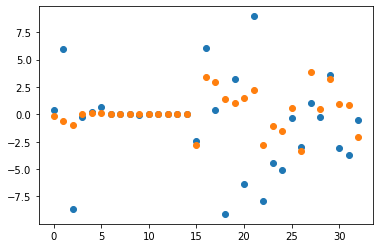

In [379]:
print(xi.argmax())
# print(xi)
print(xi.max())
plt.plot(xi, 'o')  

(29, 2)


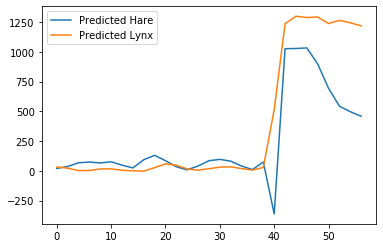

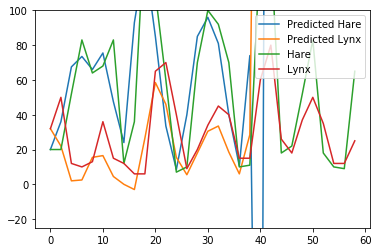

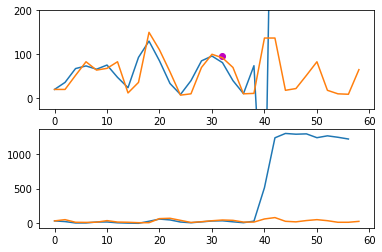

In [380]:
#predict
b = A_long @ xi;
from_end = -1
x_t = [hare[0], lynx[0]]
answer = [x_t]
for i in range(len(b)):
    x_t = x_t + b[i]*delta_t
    answer.append(x_t)
print(array(answer).shape)
plt.plot(year[0:from_end], answer);
plt.legend(["Predicted Hare", "Predicted Lynx"])
plt.show()
plt.plot(year[0:from_end], answer);
plt.plot(year, hare)
plt.plot(year, lynx)
plt.legend(["Predicted Hare", "Predicted Lynx", "Hare", "Lynx"])
plt.ylim([-25, 100])
plt.show()
fig = plt.subplot(2,1,1)
# pred_hares = array(answer)[:,0]
fig.plot(year[0:from_end], array(answer)[:,0])
plt.ylim([-25, 200])
fig.plot(year[-14], array(answer)[-14, 0], 'mo')
plt.plot(year, hare)
fig = plt.subplot(2,1,2)
# pred_hares = array(answer)[:,0]
fig.plot(year[0:from_end], array(answer)[:,1])
plt.plot(year, lynx)
plt.show()

[[0.43475928 0.        ]
 [5.99588087 0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.20748614 0.08484524]
 [0.64639437 0.12095638]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [6.02193574 3.42663978]
 [0.38960371 2.978892  ]
 [0.         1.41579335]
 [3.25895983 1.03402828]
 [0.         1.49022633]
 [8.95018125 2.23039561]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.57971553]
 [0.         0.        ]
 [1.0475165  3.87677056]
 [0.         0.46481463]
 [3.58993126 3.25625554]
 [0.         0.96333732]
 [0.         0.8401494 ]
 [0.         0.        ]]
(29, 2)


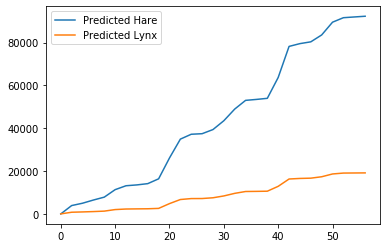

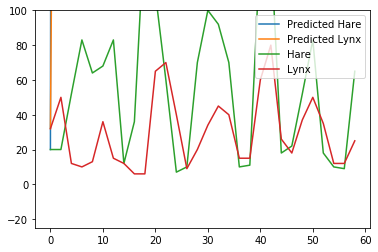

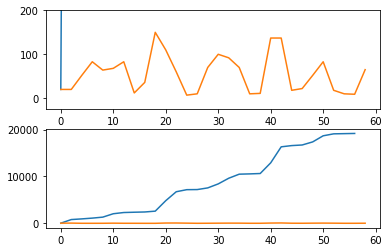

In [371]:
# print(xi)
xi_less = zeros(xi.shape)
ep = 0.01
for i in range(len(xi)):
    for j in range(len(xi[0])):
        if(xi[i,j]> ep):
            xi_less[i,j] = xi[i,j]
            
print(xi_less)
b = A_long @ xi_less;
from_end = -1
x_t = [hare[0], lynx[0]]
answer = [x_t]
for i in range(len(b)):
    x_t = x_t + b[i]*delta_t
    answer.append(x_t)
print(array(answer).shape)
plt.plot(year[0:from_end], answer);
plt.legend(["Predicted Hare", "Predicted Lynx"])
plt.show()
plt.plot(year[0:from_end], answer);
plt.plot(year, hare)
plt.plot(year, lynx)
plt.legend(["Predicted Hare", "Predicted Lynx", "Hare", "Lynx"])
plt.ylim([-25, 100])
plt.show()
fig = plt.subplot(2,1,1)
# pred_hares = array(answer)[:,0]
fig.plot(year[0:from_end], array(answer)[:,0])
plt.ylim([-25, 200])
fig.plot(year[-14], array(answer)[-14, 0], 'mo')
plt.plot(year, hare)
fig = plt.subplot(2,1,2)
# pred_hares = array(answer)[:,0]
fig.plot(year[0:from_end], array(answer)[:,1])
plt.plot(year, lynx)
plt.show()

C:\Users\16kat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 336.24192655925106, tolerance: 0.5998131578947369
  positive)
C:\Users\16kat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74.30274997800575, tolerance: 0.1283151315789474
  positive)


(19, 33)
[[ 0.00000000e+00  0.00000000e+00]
 [-1.15713381e+00 -3.00623982e-01]
 [ 1.17206999e+00  1.11609565e-01]
 [-4.37005282e-03 -1.85121778e-03]
 [ 4.18652410e-02  8.21378564e-03]
 [-4.56662694e-02 -1.10336892e-02]
 [ 1.62004150e-05  9.56380603e-06]
 [-2.17876438e-05  2.51855103e-05]
 [ 7.91029495e-05  2.15157568e-05]
 [-2.05520309e-04 -2.76039059e-05]
 [ 3.62344007e-07  8.68102778e-08]
 [-1.35799056e-06  2.65374295e-07]
 [-1.03268051e-07 -4.42125034e-07]
 [-8.48903616e-08  1.02463473e-07]
 [ 1.50275820e-06  9.04819155e-07]
 [-1.93519643e+00 -9.67550766e-01]
 [ 0.00000000e+00  6.20036559e+00]
 [-7.05418046e+00  0.00000000e+00]
 [ 1.14201175e+01  2.85433407e-01]
 [-2.48628096e-01 -0.00000000e+00]
 [-3.07569343e+01 -0.00000000e+00]
 [ 1.35899166e+01  1.39368618e+00]
 [-7.78596332e+00 -0.00000000e+00]
 [-6.74420017e+00 -4.49498692e+00]
 [-1.97117045e+01  9.79118838e-01]
 [-0.00000000e+00 -7.12909373e-01]
 [ 9.96842556e+00 -5.65923945e+00]
 [ 2.07346092e+01  6.40074531e+00]
 [-0.000000

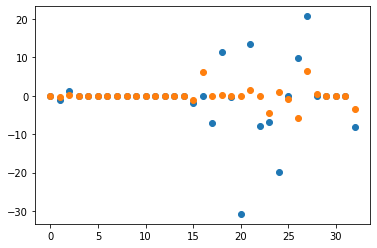

In [370]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(A, rhs)
print(A.shape)
x = clf.coef_
x = transpose(x)
print(x)
plt.plot(x, 'o')  
plt.show()


[   20.           -71.24947232  -149.41013522  -248.34068895
  -351.56435312  -445.76151733  -566.24956673  -689.79597883
  -727.19655525  -794.97335886  -944.25049986 -1100.01229782
 -1225.26548803 -1305.09547204 -1376.71171087 -1474.20422036
 -1589.71176064 -1737.06834804 -1865.88040447 -1908.45909296
 -2032.78598971 -2226.60138663 -2061.51767207 -2107.12330421
 -2123.05615272 -2151.70856569 -2127.55078355 -2217.84943953
 -2283.7889831 ]


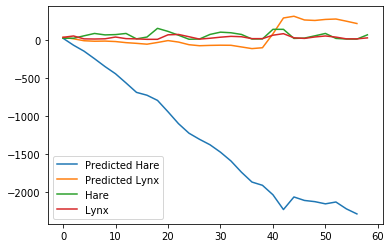

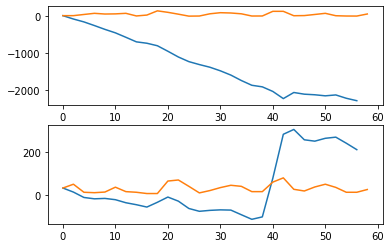

In [369]:
#predict
b = A_long @ x;
# print(b)
# x_0 = [hare[0], lynx[0]]
# answer = []
# for i in range(len(b)):
#     answer.append(x_0 + b[i]*delta_t)
# print(b)
from_end = -1
x_t = [hare[0], lynx[0]]
answer = [x_t]
for i in range(len(b)):
    x_t = x_t + b[i]*delta_t
    answer.append(x_t)
print(array(answer)[:,0])
plt.plot(year[0:from_end], answer);
plt.plot(year, hare)
plt.plot(year, lynx)
plt.legend(["Predicted Hare", "Predicted Lynx", "Hare", "Lynx"])
plt.show()
fig = plt.subplot(2,1,1)
# pred_hares = array(answer)[:,0]
fig.plot(year[0:from_end], array(answer)[:,0])
plt.plot(year, hare)
fig = plt.subplot(2,1,2)
# pred_hares = array(answer)[:,0]
fig.plot(year[0:from_end], array(answer)[:,1])
plt.plot(year, lynx)
plt.show()